# Oficina Aula 2.2
Durante a aula, você aprendeu a utilizar gráficos de pizza e gráficos de barra para visualizar proporções entre categorias, permitindo comparar partes com o todo. Agora, é hora de exercitar o que você aprendeu!

Nesta oficina, você deve continuar a analisar os dados de vendas de videogames. Portanto, crie um Jupyter Notebook e responda cada questão com código em uma célula.

1.   Importe as bibliotecas pandas e matplotlib, usando a palavra mágica inline para exibir as visualizações no notebook; e carregue os dados, que estão disponibilizados neste link:dados, em um DataFrame. Assim, você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente;
1.   Crie uma visualização que mostre a proporção de vendas global entre gêneros de jogos da empresa Nintendo;
1.   Crie uma visualização que mostre a proporção de quantidade de jogos por plataforma a partir do ano de 2015

# 1  Importe as bibliotecas pandas/ Carregue os dados em um DataFrame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data_games = pd.read_csv('https://raw.githubusercontent.com/evelynsantos/Data-visualization/main/dadosoficina04.txt')
data_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 2 visualização com proporção de vendas global do dataset

In [13]:
global_sales_nintendo = data_games[data_games['Publisher'] == 'Nintendo']
generos_nintendo = global_sales_nintendo.groupby(by='Genre').sum()
global_sales_nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


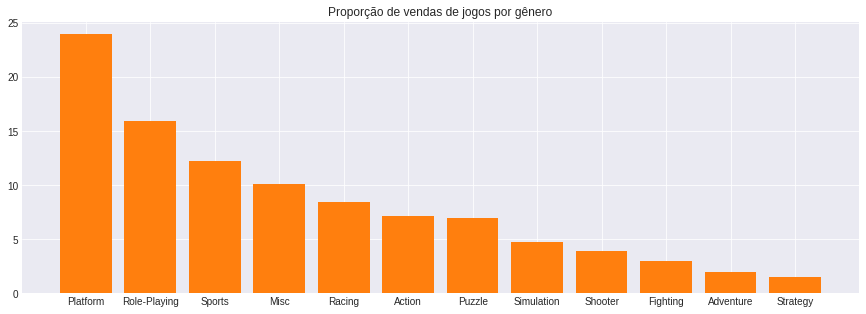

In [14]:
global_nintendo_sort= generos_nintendo.sort_values(by='Global_Sales', ascending=False)
porcentagens = global_nintendo_sort['Global_Sales']*100.0/global_nintendo_sort['Global_Sales'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.bar(global_nintendo_sort.index, porcentagens, color='C1')
plt.title('Proporção de vendas de jogos por gênero')
plt.show()

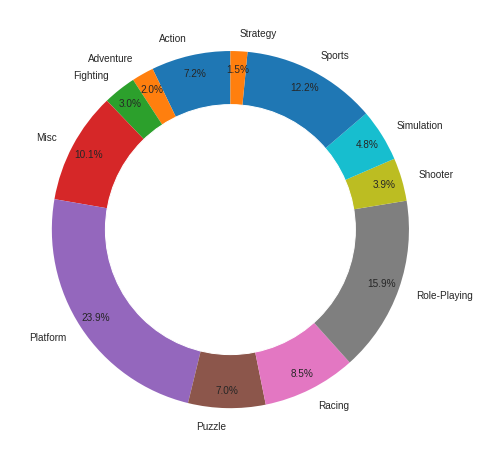

In [19]:
plt.figure(figsize=(8, 10))
plt.pie(x=generos_nintendo['Global_Sales'], labels = generos_nintendo.index, autopct='%1.1f%%',startangle=90, pctdistance=0.90)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# 3 visualização da proporção de quantidade de jogos

In [20]:
gender_period = data_games.query('Year > 2014')
gender_period = gender_period.groupby(by='Platform').sum()
gender_period

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
3DS,1240523,243850.0,6.65,5.34,20.42,1.11,33.59
DS,5959,2020.0,0.27,0.00,0.00,0.02,0.29
PC,1069198,177358.0,3.04,6.87,0.00,0.72,10.67
PS3,1169252,213622.0,5.16,8.23,4.80,2.57,20.81
PS4,2143749,493784.0,52.62,67.91,10.45,23.59,154.58
PSP,43389,6045.0,0.00,0.00,0.12,0.00,0.12
PSV,2359673,352689.0,0.73,1.58,7.54,0.62,10.52
Wii,34894,8060.0,0.57,0.87,0.00,0.12,1.55
WiiU,317560,76580.0,8.26,5.89,3.96,1.54,19.67


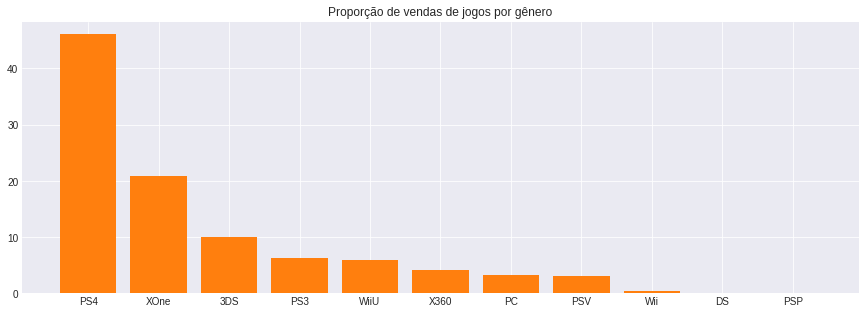

In [17]:
gender_period_sort = gender_period.sort_values(by='Global_Sales', ascending=False)
porcentagens = gender_period_sort['Global_Sales']*100.0/gender_period_sort['Global_Sales'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.bar(gender_period_sort.index, porcentagens, color='C1')
plt.title('Proporção de vendas de jogos por gênero')
plt.show()